# Netflix 원본 데이터
## Data 살펴보기

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

In [2]:
netflix_df = pd.read_csv("/content/drive/MyDrive/DATATHON/dataset/netflix_titles.csv")
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
netflix_df.shape

(8807, 12)

In [4]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# 결측치
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
netflix_df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
netflix_df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [9]:
netflix_df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

## 연도별 데이터

In [10]:
netflix_df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

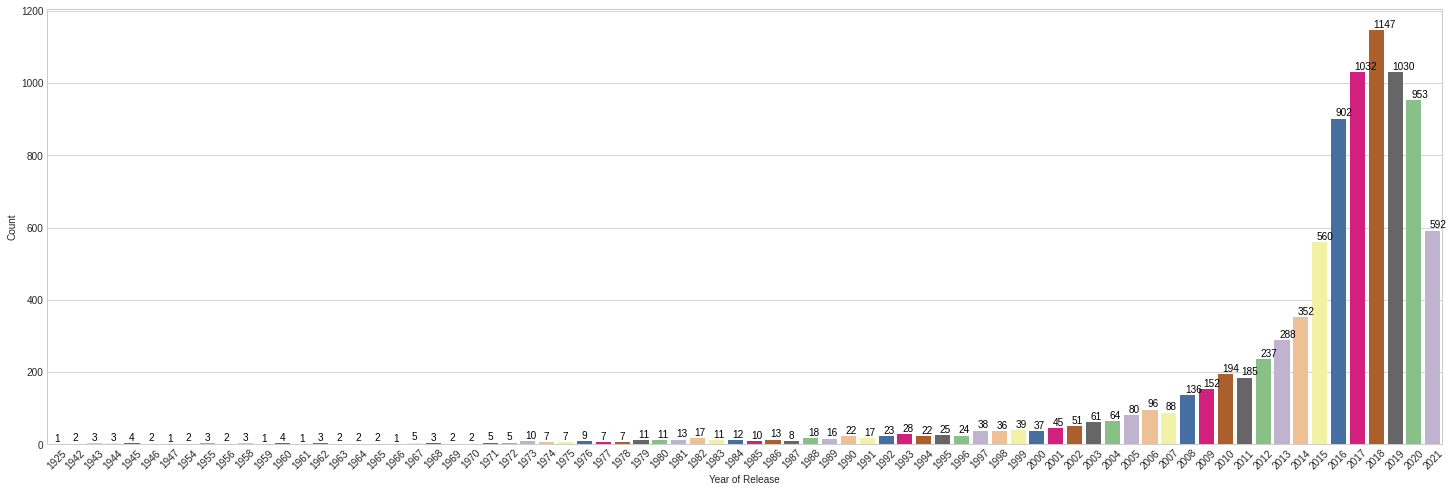

In [11]:
plt.figure(figsize = (25, 8))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'release_year', data = netflix_df, palette = "Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

## 나라별 데이터

In [12]:
netflix_df["country"].nunique()

748

In [13]:
netflix_df["country"].value_counts()[:10]

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [14]:
country_count = netflix_df.copy()
country_count = pd.concat([country_count, netflix_df["country"].str.split(", ", expand = True)], axis = 1)
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

,type,title,variable,country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [15]:
country_count["country"].nunique()

127

In [16]:
country_count["country"].value_counts()[:50]

United States           3689
India                   1046
United Kingdom           804
Canada                   445
France                   393
Japan                    318
Spain                    232
South Korea              231
Germany                  226
Mexico                   169
China                    162
Australia                160
Egypt                    117
Turkey                   113
Hong Kong                105
Nigeria                  103
Italy                    100
Brazil                    97
Argentina                 91
Belgium                   90
Indonesia                 90
Taiwan                    89
Philippines               83
Thailand                  70
South Africa              62
Colombia                  52
Netherlands               50
Denmark                   48
Ireland                   46
Sweden                    42
Singapore                 41
Poland                    40
United Arab Emirates      37
New Zealand               33
Lebanon       

## 장르별 데이터

In [17]:
genre_list = []
for genre in netflix_df["listed_in"]:
  genre = genre.split(', ')
  for genre_uniq in genre:
    genre_list.append(genre_uniq)
genre_list = set(genre_list)
genre_list

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

In [18]:
len(genre_list)

42

In [19]:
genre_count = netflix_df.copy()
genre_count = pd.concat([genre_count, netflix_df["listed_in"].str.split(", ", expand = True)], axis = 1)
genre_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,0,1,2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies,Comedies,None


In [20]:
genre_count = genre_count.melt(id_vars = ["type", "title"], value_vars = range(3), value_name = "listed_in")
genre_count = genre_count[genre_count["listed_in"].notna()]
genre_count

,type,title,variable,listed_in
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26414,TV Show,Zindagi Gulzar Hai,2,TV Dramas
26415,Movie,Zinzana,2,Thrillers
26416,Movie,Zodiac,2,Thrillers
26417,TV Show,Zombie Dumb,2,TV Comedies


In [21]:
genre_count["listed_in"].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

## 월별 데이터

In [22]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [23]:
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7209,s7210,TV Show,Kingdoms of the Sky,Steve Greenwood,NaN,NaN,2018-10-01,2018,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Meet the astonishing animals and adventurous p...


In [24]:
netflix_df["date_added"].dt.month

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8802    11.0
8803     7.0
8804    11.0
8805     1.0
8806     3.0
Name: date_added, Length: 8807, dtype: float64

In [25]:
netflix_df["date_added_month"] = netflix_df["date_added"].dt.month.fillna(-1)
netflix_df["date_added_month"].unique()

array([ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 12., 11., 10., -1.])

In [26]:
netflix_df["date_added_month"] = netflix_df["date_added_month"].astype("Int64")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_month  8807 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(10)
memory usage: 903.2+ KB


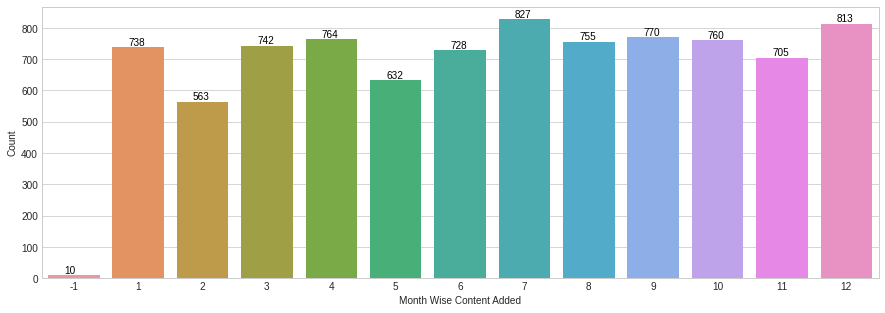

In [27]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x = 'date_added_month', data = netflix_df)
plt.xlabel('Month Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

## 일별 데이터

In [28]:
netflix_df["date_added_day"] = netflix_df["date_added"].dt.day.fillna(-1)
netflix_df["date_added_day"].unique()

array([25., 24., 23., 22., 21., 20., 19., 17., 16., 15., 14., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 31., 29., 28., 27.,
       26., 18., 13., 12., 30., -1.])

In [29]:
netflix_df["date_added_day"] = netflix_df["date_added_day"].astype("Int64")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_month  8807 non-null   Int64         
 13  date_added_day    8807 non-null   Int64         
dtypes: Int64(2), datetime64[

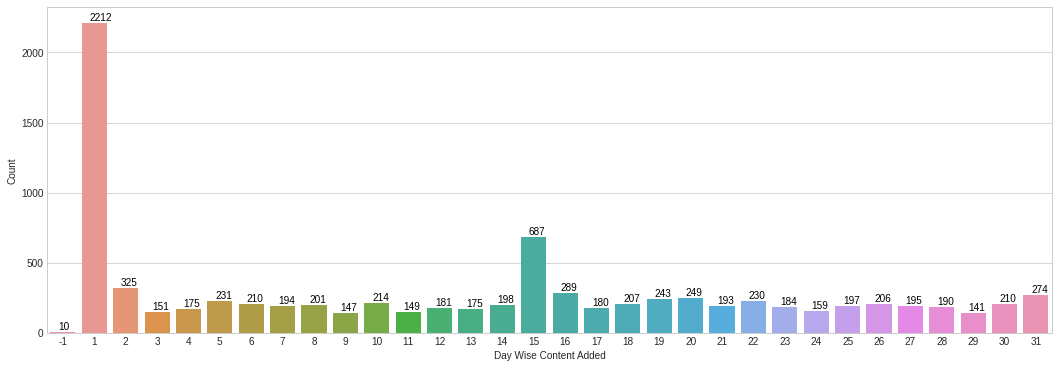

In [30]:
plt.figure(figsize = (18, 6))
ax = sns.countplot(x = 'date_added_day', data = netflix_df)
plt.xlabel('Day Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

## 배우 별 분석 (한국)

In [40]:
cast_count = netflix_df.copy()
cast_count = cast_count[(cast_count["country"] == "South Korea")]
cast_count = pd.concat([cast_count, cast_count["cast"].str.split(",", expand = True)], axis = 1)
cast_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,13,14,15,16,17,18,19,20,21,22
104,s105,TV Show,Tayo the Little Bus,NaN,"Robyn Slade, Kami Desilets",South Korea,2021-09-06,2016,TV-Y,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
124,s125,TV Show,Pororo - The Little Penguin,NaN,NaN,South Korea,2021-09-02,2013,TV-Y7,3 Seasons,...,None,None,None,None,None,None,None,None,None,None
289,s290,TV Show,The Crowned Clown,NaN,"Yeo Jin-goo, Lee Se-young, Kim Sang-kyung, Jun...",South Korea,2021-08-10,2019,TV-14,1 Season,...,None,None,None,None,None,None,None,None,None,None
456,s457,TV Show,Her Private Life,NaN,"Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...",South Korea,2021-07-15,2019,TV-14,1 Season,...,None,None,None,None,None,None,None,None,None,None
545,s546,TV Show,YooHoo to the Rescue,NaN,"Kira Buckland, Ryan Bartley, Bryce Papenbrook,...",South Korea,2021-07-06,2020,TV-Y,3 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,s8464,Movie,The President's Barber,Chan-sang Lim,"Kang-ho Song, So-ri Moon, Jae-eung Lee, Yeong-...",South Korea,2017-10-01,2004,TV-MA,116 min,...,None,None,None,None,None,None,None,None,None,None
8467,s8468,Movie,The Prison,Na Hyeon,"Suk-kyu Han, Rae-won Kim, Kyeong-yeong Lee, Wo...",South Korea,2017-11-18,2017,TV-MA,125 min,...,None,None,None,None,None,None,None,None,None,None
8575,s8576,TV Show,This Is My Love,NaN,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",South Korea,2017-05-22,2015,TV-14,1 Season,...,None,None,None,None,None,None,None,None,None,None
8613,s8614,Movie,Train to Busan,Sang-ho Yeon,"Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...",South Korea,2017-03-18,2016,TV-MA,118 min,...,None,None,None,None,None,None,None,None,None,None


In [41]:
cast_count = cast_count.melt(id_vars = ["type", "title"], value_vars = range(23), value_name = "cast")
cast_count = cast_count[cast_count["cast"].notna()]
cast_count

,type,title,variable,cast
0,TV Show,Tayo the Little Bus,0,Robyn Slade
2,TV Show,The Crowned Clown,0,Yeo Jin-goo
3,TV Show,Her Private Life,0,Park Min-young
4,TV Show,YooHoo to the Rescue,0,Kira Buckland
5,Movie,The 8th Night,0,Lee Sung-min
...,...,...,...,...
3788,TV Show,Love (ft. Marriage and Divorce),19,Yun Seo-hyun
3801,TV Show,"Hello, Me!",19,Shin Mun-seong
4000,TV Show,"Hello, Me!",20,Kim Ki-ri
4199,TV Show,"Hello, Me!",21,Koh Woo-ri


In [42]:
cast_count["cast"].nunique()

1179

In [45]:
cast_count["cast"].value_counts()[:50]

 Sung Dong-il        6
 Nam Joo-hyuk        5
 Kyeong-yeong Lee    5
 Kim Won-hae         5
 Park Hae-joon       5
 Cho Seong-ha        5
 Park Shin-hye       4
 Lee Il-hwa          4
 Oh Jung-se          4
 Kim Sun-young       4
 Park Ho-san         4
 Kim Min-sang        4
 Cho Han-cheul       4
 Do-won Kwak         3
 Tae-im Lee          3
 Bae Jong-ok         3
 Eui-sung Kim        3
 Yeom Hye-ran        3
Park Bo-young        3
 So-hui Yoon         3
 Kim Eui-sung        3
Hyun Bin             3
 Kim Kap-soo         3
 Kang Ha-neul        3
 Jo Woo-jin          3
 Shin-il Kang        3
 Song Young-chang    3
 Woo Do‑hwan         3
 Jung Hae-in         3
Lee Seung-gi         3
 Song Sun-mi         3
 Yun Seo-hyun        3
 Jang Seung-jo       3
 Krystal Jung        3
 Kim Ji-won          3
 Shin Dong-mi        3
 Kim Mee-kyeong      3
 Song Kang           3
 Yoo Yeon-seok       3
 Kim Young-min       3
 Kim Mee-kyung       3
 Ahn Nae-sang        3
 Park Hyuk-kwon      3
 Kim Seon-h

---
## Netflix Original / IMDB 데이터

In [51]:
file = "/content/drive/MyDrive/DATATHON/dataset/NetflixOriginals.csv"
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [60]:
orig = pd.read_csv("/content/drive/MyDrive/DATATHON/dataset/NetflixOriginals.csv", encoding='Windows-1252')
orig.head(20)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [56]:
orig.shape

(584, 6)

In [57]:
orig.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [58]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [59]:
orig['date'] = pd.to_datetime(orig['Premiere'])
orig['date']

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: date, Length: 584, dtype: datetime64[ns]

## 장르별 분석

In [61]:
orig_genre = orig.copy()
orig_genre = pd.concat([orig_genre, orig_genre["Genre"].str.split("/", expand = True)], axis = 1)
orig_genre

,Title,Genre,Premiere,Runtime,IMDB Score,Language,0,1,2,3
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Documentary,None,None,None
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Thriller,None,None,None
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Science fiction,Drama,None,None
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Horror thriller,None,None,None
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Mystery,None,None,None
...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Concert Film,None,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Documentary,None,None,None
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,One-man show,None,None,None
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Documentary,None,None,None


In [62]:
orig_genre = orig_genre.melt(id_vars = ["Title", "IMDB Score"], value_vars = range(4), value_name = "Genre")
orig_genre = orig_genre[orig_genre["Genre"].notna()]
orig_genre

,Title,IMDB Score,variable,Genre
0,Enter the Anime,2.5,0,Documentary
1,Dark Forces,2.6,0,Thriller
2,The App,2.6,0,Science fiction
3,The Open House,3.2,0,Horror thriller
4,Kaali Khuhi,3.4,0,Mystery
...,...,...,...,...
1482,The Willoughbys,6.4,2,Adventure
1616,The Christmas Chronicles,7.0,2,Adventure
1741,Klaus,8.2,2,Comedy
2200,The Christmas Chronicles,7.0,3,Comedy


In [67]:
orig_genre["Genre"].value_counts()[:20]

KeyError: ignored

## 평점 top 20

In [69]:
top_20 = df[['IMDB Score','Title','Genre','Language']].sort_values(['IMDB Score'], ascending=False)[:20]
top_20

,IMDB Score,Title,Genre,Language
583,9.0,David Attenborough: A Life on Our Planet,Documentary,English
582,8.6,Emicida: AmarElo - It's All For Yesterday,Documentary,Portuguese
581,8.5,Springsteen on Broadway,One-man show,English
580,8.4,Winter on Fire: Ukraine's Fight for Freedom,Documentary,English/Ukranian/Russian
579,8.4,Taylor Swift: Reputation Stadium Tour,Concert Film,English
578,8.4,Ben Platt: Live from Radio City Music Hall,Concert Film,English
577,8.3,Dancing with the Birds,Documentary,English
576,8.3,Cuba and the Cameraman,Documentary,English
573,8.2,Klaus,Animation/Christmas/Comedy/Adventure,English
571,8.2,13th,Documentary,English


## bottom 20

In [70]:
bottom_20 = df[['IMDB Score','Title','Genre','Language']].sort_values(['IMDB Score'])[:20]
bottom_20

,IMDB Score,Title,Genre,Language
0,2.5,Enter the Anime,Documentary,English/Japanese
1,2.6,Dark Forces,Thriller,Spanish
2,2.6,The App,Science fiction/Drama,Italian
3,3.2,The Open House,Horror thriller,English
4,3.4,Kaali Khuhi,Mystery,Hindi
5,3.5,Drive,Action,Hindi
6,3.7,Leyla Everlasting,Comedy,Turkish
7,3.7,The Last Days of American Crime,Heist film/Thriller,English
8,3.9,Paradox,Musical/Western/Fantasy,English
9,4.1,Sardar Ka Grandson,Comedy,Hindi
